<a href="https://colab.research.google.com/github/naren-17/BOOTCAMP/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**

**Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [ ]:
X = df[['MedInc']].values
y = df['Target'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1.14958917, 1.50606882, 1.90393718, ..., 4.31500772, 1.612455  ,
       1.93412956])

In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.4f}")

R-squared Score: 0.4589


**Task 2**

**Data Visualization for Regression**

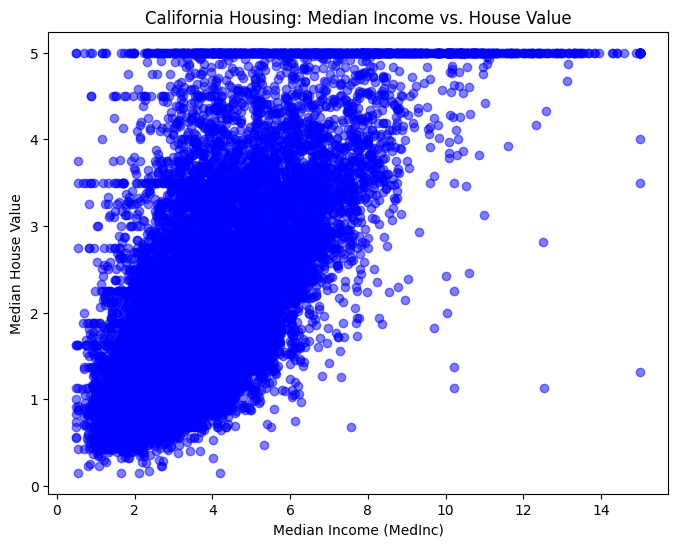

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value")
plt.title("California Housing: Median Income vs. House Value")
plt.show()

In [ ]:
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(X_line)

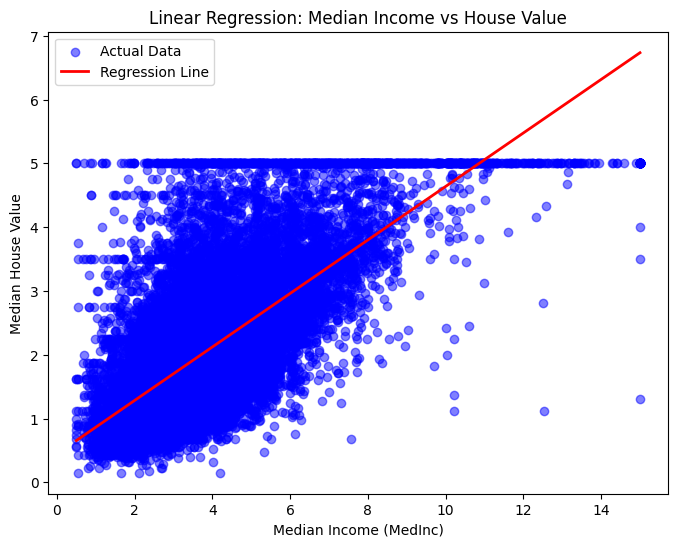

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label="Actual Data")
plt.plot(X_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value")
plt.title("Linear Regression: Median Income vs House Value")
plt.legend()
plt.show()


**Task 3**

**Multiple Linear Regression**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f"Intercept: {model.intercept_}")
print(f"co-efficient : {model.coef_}")

Intercept: -37.02327770606409
co-efficient : [ 4.48674910e-01  9.72425752e-03 -1.23323343e-01  7.83144907e-01
 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01 -4.33708065e-01]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [ ]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f"R-squared Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared Score: 0.5758
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456


**Task 4**

**Model Assessment**

In [ ]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R-squared Score: 0.5758
Root Mean Squared Error (RMSE): 0.7456


**Task 5**

**Feature Impact Analysis**

In [ ]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_}).sort_values(by='Coefficient', ascending=False)
feature_importance

,Feature,Coefficient
3,AveBedrms,0.783145
0,MedInc,0.448675
1,HouseAge,0.009724
4,Population,-0.000002
5,AveOccup,-0.003526
2,AveRooms,-0.123323
6,Latitude,-0.419792
7,Longitude,-0.433708


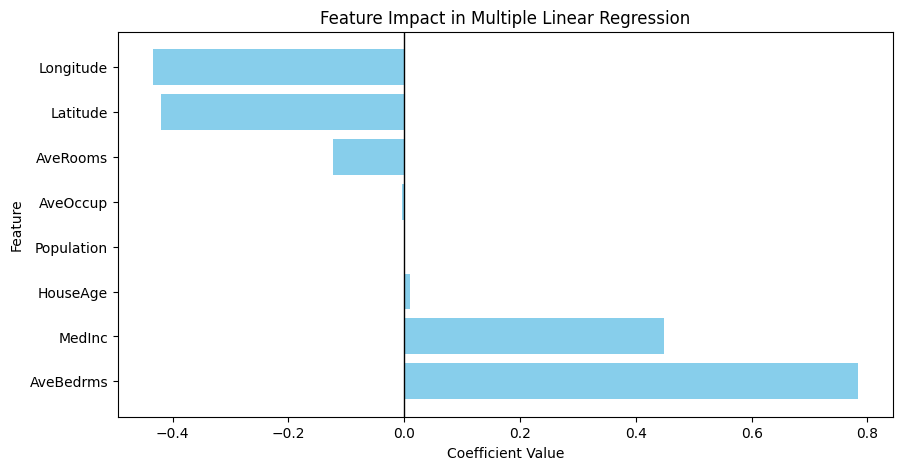

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(feature_importance["Feature"], feature_importance["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Impact in Multiple Linear Regression")
plt.axvline(0, color='black', linewidth=1)
plt.show()

**Task 6**

**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:

lin_model = LinearRegression().fit(X_train, y_train)
poly_model = LinearRegression().fit(X_train_poly, y_train)
y_pred_lin = lin_model.predict(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

r2_linear = r2_score(y_test, y_pred_lin)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Linear Regression R²: {r2_linear:.4f}")
print(f"Polynomial Regression R²: {r2_poly:.4f}")


Linear Regression R²: 0.4589
Polynomial Regression R²: 0.4633


In [ ]:
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)  # Standardize it
X_range_poly = poly.transform(X_range_scaled)
y_range_lin = lin_reg.predict(X_range_scaled)
y_range_poly = poly_reg.predict(X_range_poly)


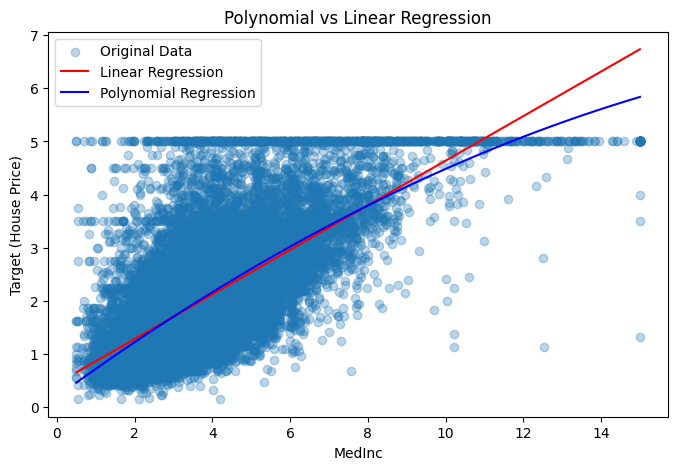

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, alpha=0.3, label="Original Data")
plt.plot(X_range, y_range_lin, label="Linear Regression", color="red")
plt.plot(X_range, y_range_poly, label="Polynomial Regression", color="blue")
plt.xlabel(feature_name)
plt.ylabel("Target (House Price)")
plt.title("Polynomial vs Linear Regression")
plt.legend()
plt.show()

**Task 7**

**Outlier Impact**

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [ ]:
z_scores = np.abs(zscore(X))
threshold = 3
outliers = np.where(z_scores > threshold)[0]
print(f"Number of outliers detected: {len(outliers)}")

Number of outliers detected: 973


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_outliers = LinearRegression().fit(X_train, y_train)

y_pred_outliers = model_outliers.predict(X_test)

r2_outliers = r2_score(y_test, y_pred_outliers)
print(f"R² with outliers: {r2_outliers:.4f}")


R² with outliers: 0.5758


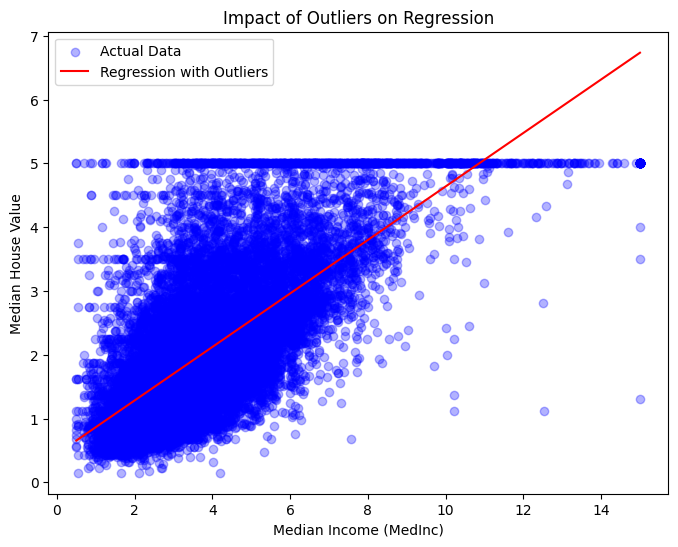

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(X, y, color='blue', alpha=0.3, label="Actual Data")
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
plt.plot(X_range, y_range_outliers, color='red', label="Regression with Outliers")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value")
plt.title("Impact of Outliers on Regression")
plt.legend()
plt.show()


**Task 8**

**Regularization Implementation**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
ridge_reg = Ridge(alpha=1.0).fit(X_train_scaled, y_train)
lasso_reg = Lasso(alpha=0.1).fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [ ]:
r2_lin = r2_score(y_test, y_pred_lin)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Linear Regression R²: {r2_lin:.4f}")
print(f"Ridge Regression R²: {r2_ridge:.4f}")
print(f"Lasso Regression R²: {r2_lasso:.4f}")

Linear Regression R²: 0.5758
Ridge Regression R²: 0.5758
Lasso Regression R²: 0.4814


In [ ]:
features = np.array(data.feature_names)
coef_lin = np.squeeze(lin_reg.coef_)
coef_ridge = np.squeeze(ridge_reg.coef_)
coef_lasso = np.squeeze(lasso_reg.coef_)

print(f"Features count: {len(features)}")
print(f"Linear Regression Coefficients Shape: {coef_lin.shape}")
print(f"Ridge Regression Coefficients Shape: {coef_ridge.shape}")
print(f"Lasso Regression Coefficients Shape: {coef_lasso.shape}")


Features count: 8
Linear Regression Coefficients Shape: (8,)
Ridge Regression Coefficients Shape: (8,)
Lasso Regression Coefficients Shape: (8,)


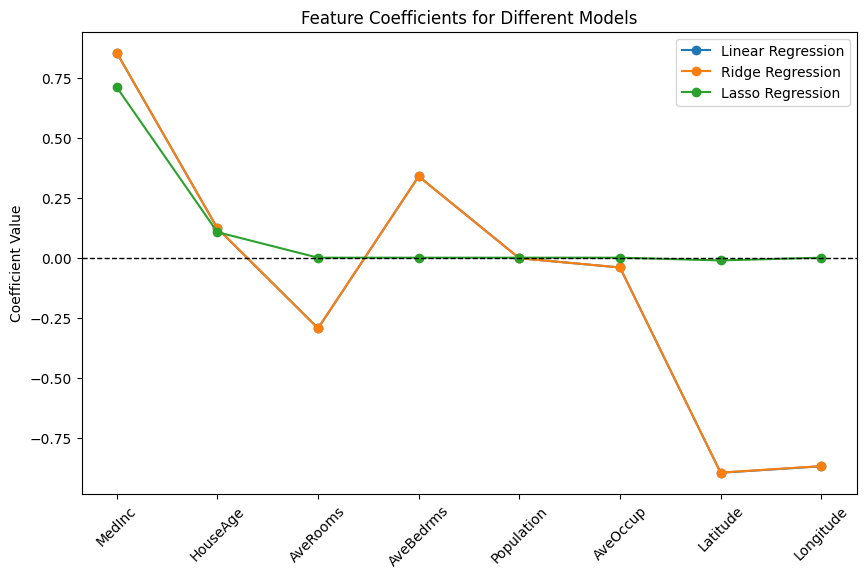

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(features, coef_lin, 'o-', label="Linear Regression")
plt.plot(features, coef_ridge, 'o-', label="Ridge Regression")
plt.plot(features, coef_lasso, 'o-', label="Lasso Regression")
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.xticks(rotation=45)
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients for Different Models")
plt.legend()
plt.show()
